# Practical Review + Multiclass Wrap Up

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize

0) Read data file

In [28]:
class_map = {'Iris-setosa\n':0, 'Iris-versicolor\n':1, 'Iris-virginica\n':2}
features = []
classes = []
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
with open('iris.data') as f:
    for line in f:
        s = line.split(',')
        if len(s)==5:
            feature = [float(x) for x in s[:4]]
            features.append(feature)
            classes.append(class_map[s[-1]])
ndata = len(features)
features = np.array(features)
classes = np.array(classes)
padded_features = np.lib.pad(features,((0,0),(1,0)),'constant', constant_values=1)
#print padded_features
#print features
#print classes

1) Make scatter plot of every single features.

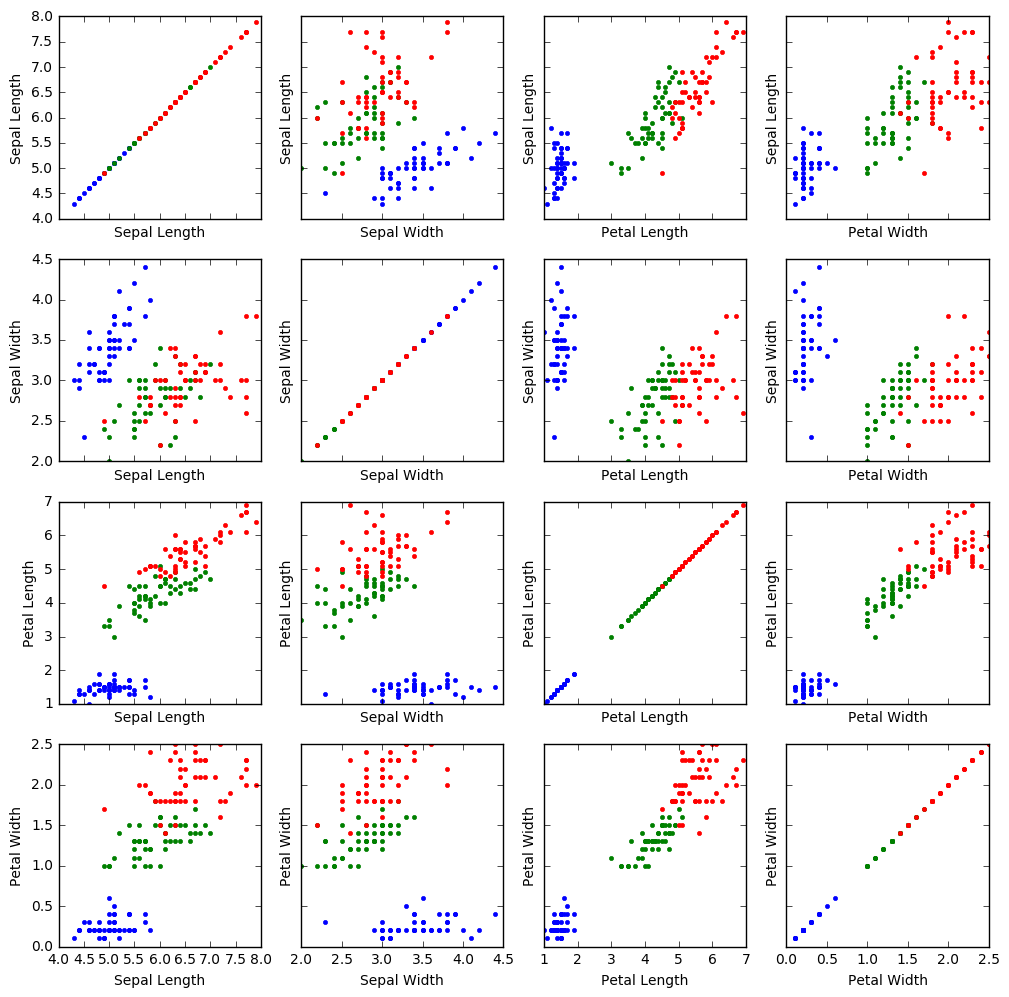

In [29]:
nfeature = len(feature_names)
fig, axarr = plt.subplots(nfeature, nfeature,figsize=(12,12), sharex="col", sharey="row")
for fx in range(nfeature):
    for fy in range(nfeature):
        for iclass in [0,1,2]:
            ax = axarr[fy, fx]
            rows = classes==iclass
            xs = features[rows,fx]
            ys = features[rows,fy]
            ax.plot(xs, ys, '.')
            ax.set_xlabel(feature_names[fx])
            ax.set_ylabel(feature_names[fy])

2) Then train each classifier

In [34]:
def thetha(x):
    x = np.clip(x,-200,200)
    return 1./ (1. + np.exp(-x))

class LogisticRegression:
    def __init__(self):
        self.w = None
        
    def fit(self, classes, features):
        # train the classifier by minimizing the cost function
        def cost(w):
            # take dot product times by the class 
            d_o_t = classes* np.dot(features,w)
            # return the log likelihood stuff
            return -np.sum(np.log(thetha(d_o_t)))
        # set the class w to the one we minimized
        res = minimize(cost, [0]*len(features[0]))
        print len(features[0])
        self.w = res.x
    
    def predict(self,features):
        # take the dot product
        s = np.dot(features, self.w)
        return thetha(s)

In [22]:
classes = np.array(classes)
padded_features = np.lib.pad(features,((0,0),(1,0)),'constant', constant_values=1)
print len(classes), len(padded_features)
#There are 3 of them we need to train. (2^(3-1)-1)
classifiers = []
for i in range(3):
    #first transform class
    #classes for this classifier
    new_class = classes.copy()
    new_class[classes==i] = 1
    new_class[classes!=i] = -1
    L = LogisticRegression()
    L.fit(classes,padded_features)
    classifiers.append(L)
L.w

150 150


array([ 15.13241844, -11.45585928,  20.32797457,   5.4436547 ,   1.32200176])

[ 3.83516926 -1.93019992 -2.18459278]


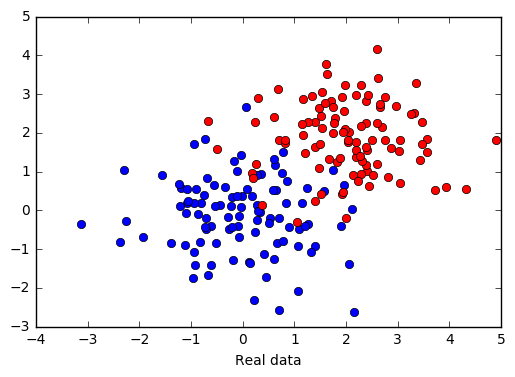

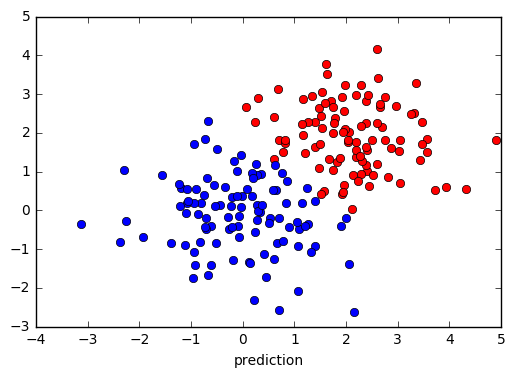

In [11]:
ndata = 100
positive = np.random.randn(ndata,2)
negative = np.random.randn(ndata, 2) +[2,2]
plt.xlabel("Real data")
plt.plot(positive[:, 0], positive[:, 1], 'ob')
plt.plot(negative[:, 0], negative[:, 1], 'or')
 
classes = np.array([1]*ndata + [-1]*ndata)
feat = np.concatenate([positive, negative], axis=0)
pad = np.lib.pad(feat,((0,0),(1,0)),'constant', constant_values=1)

logrec = LogisticRegression()
logrec.fit(classes, pad)
print logrec.w
prediction = logrec.predict(pad)

plt.figure()
plt.xlabel("prediction")
plt.plot(feat[prediction < 0.5][:,0], feat[prediction < 0.5][:,1], "or")
plt.plot(feat[prediction >= 0.5][:,0], feat[prediction >= 0.5][:,1], "ob")

3) get output from classifier

4) now compare each one with the template answer

5) For each one select the one with minimum index

6) Plot Everything again with color = guesses

In [17]:
# classes = np.array(classes)
# features = np.array(features)
# class ECOCLogistic:
#     def __init__(self):
#         self.code_matrix = [[1,-1,-1],[-1,1,-1],[-1,-1,1]]
#         self.perf_matrix = [[1,0,0],[0,1,0],[0,0,1]]
#         self.classifiers = []
#         nclasses = 3
#         self.ans = [0] * nclasses
#         self.score = np.array([0] * nclasses)
#         for i in range((2**(nclasses-1))-1):
#             new_class = classes.copy()
#             new_class[classes==i] = 1
#             new_class[classes!=i] = -1
#             L = LogisticRegression()
#             L.fit(new_class,padded_features)
#             self.classifiers.append(L)
#     def predict(self, features):
#         sum_ = 0
#         # calculate score for each classifier and store it in ans
#         for i,each_classifier in enumerate(self.classifiers):
#             self.ans[i] = each_classifier.predict(features)
#         for i,j in enumerate(self.ans):
#             #print j
#             self.score[i] = (self.perf_matrix[i] - j) ** 2
#         return np.argmin(self.score)
        

In [18]:
# eco = ECOCLogistic()
# eco.predict(padded_features)

In [35]:
padded_features = np.lib.pad(features,((0,0),(1,0)),'constant', constant_values=1)
class PeterLogistic:
    def __init__(self):
        self.code_matrix = [[-1,1,1],[1,-1,1],[1,1,-1]]
        self.perf_matrix = [[0,1,1],[1,0,1],[1,1,0]]
        self.classifiers = []
        self.nclasses = 3
        for i in range((2**(self.nclasses-1))-1):
            nclass = classes.copy()
            nclass[classes==i] = 1
            nclass[classes!=i] = -1
            L = LogisticRegression()
            L.fit(nclass,padded_features)
            self.classifiers.append(L)
    def predict(self, features):
        ans = []
        for classifier in self.classifiers:
            ans += [classifier.predict(features)]
        score = []
        for i in range((2**(self.nclasses-1))-1):
            sum_ = 0
            for j in range(self.nclasses):
                sum_ += (ans[i] -  self.perf_matrix[i][j])**2
            score += [sum_]
        return np.argmin(score)

In [36]:
eco = PeterLogistic()
eco.predict(padded_features)

5
5
5


438

82.6666666667


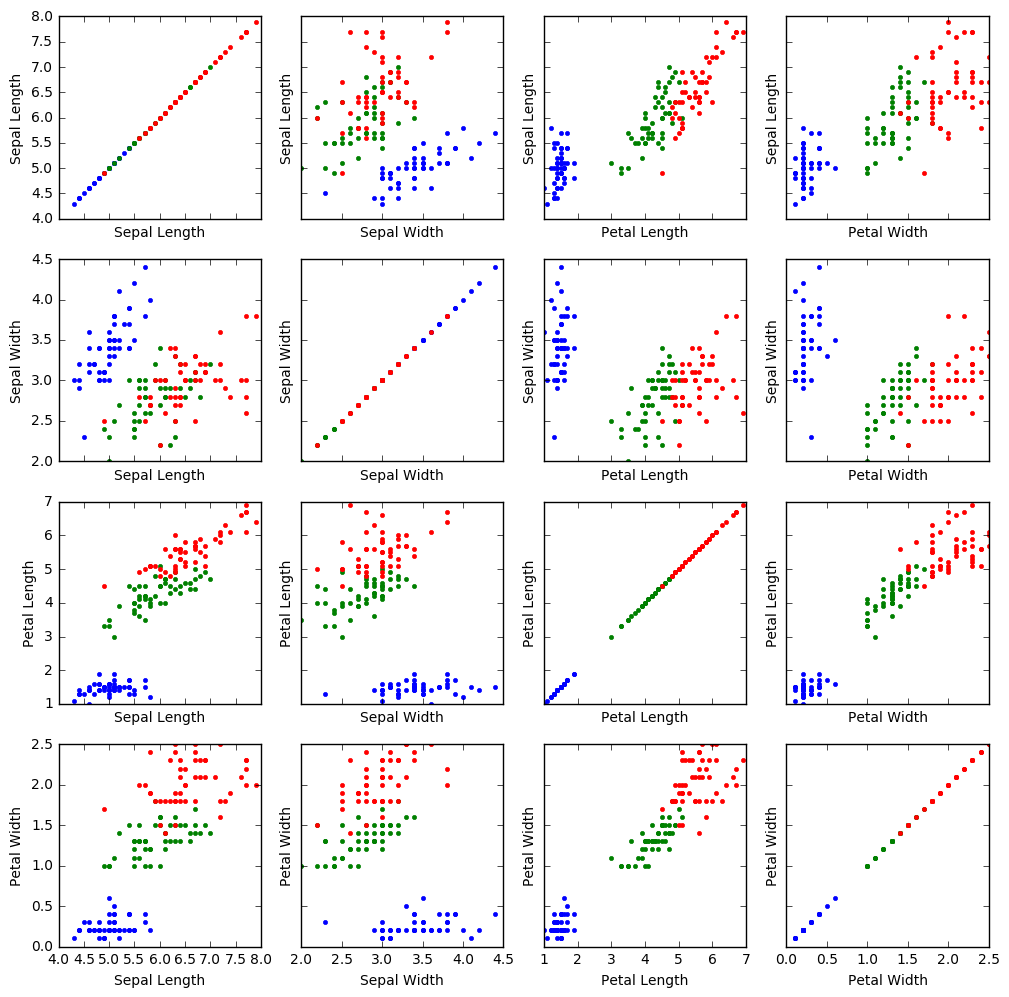

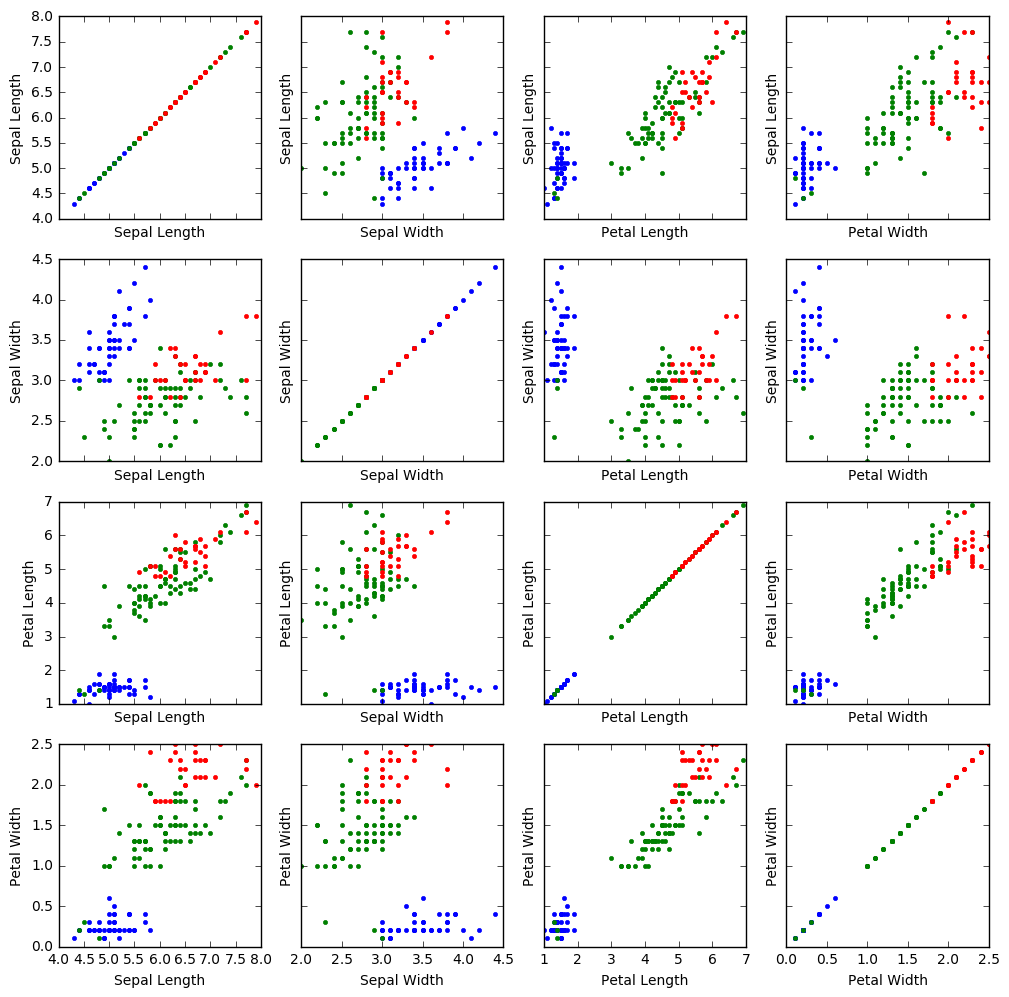

In [33]:
nfeature = len(feature_names)
fig, axarr = plt.subplots(nfeature, nfeature,figsize=(12,12), sharex="col", sharey="row")
for fx in range(nfeature):
    for fy in range(nfeature):
        for iclass in [0,1,2]:
            ax = axarr[fy, fx]
            rows = classes==iclass
            xs = features[rows,fx]
            ys = features[rows,fy]
            ax.plot(xs, ys, '.')
            ax.set_xlabel(feature_names[fx])
            ax.set_ylabel(feature_names[fy])

            
plt.figure()
guessed_classes = []
tot = 0
pre = 0
for feature_, class_ in zip(padded_features, classes):
    tot += 1
    guessclass = eco.predict(feature_)
    guessed_classes += [guessclass]
    if guessclass == class_:
        pre +=1

print (float(pre)/float(tot))*100
guessed_classes = np.array(guessed_classes)
nfeature = len(feature_names)
fig, axarr = plt.subplots(nfeature, nfeature,figsize=(12,12), sharex="col", sharey="row")
for fx in range(nfeature):
    for fy in range(nfeature):
        for iclass in [0,1,2]:
            ax = axarr[fy, fx]
            rows = guessed_classes==iclass
            xs = features[rows,fx]
            ys = features[rows,fy]
            ax.plot(xs, ys, '.')
            ax.set_xlabel(feature_names[fx])
            ax.set_ylabel(feature_names[fy])
            